###### ---0. Libraries---

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from IPython.display import display, HTML
import matplotlib.pyplot as plt
import os


In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
df=pd.read_csv('data/attacks.csv',encoding='cp1252')

In [4]:
df2=pd.read_csv('data/attacks.csv',encoding='cp1252') #First copy of de df

# 1. EXPLORATION

Hereby, we will analyse which kind of type of data we are facing with, nº columns, null values, duplicated values, unwanted whitespaces, etc.

### 1.1 Dimensions of the df

In [5]:
df2.shape

(25723, 24)

### 1.2 Head of the df

#### Quick overview of the columns and some data

In [6]:
df2.head()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,...,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,...,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN


In [7]:
df2.columns

Index(['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex ', 'Age', 'Injury', 'Fatal (Y/N)', 'Time',
       'Species ', 'Investigator or Source', 'pdf', 'href formula', 'href',
       'Case Number.1', 'Case Number.2', 'original order', 'Unnamed: 22',
       'Unnamed: 23'],
      dtype='object')

### 1.3 Data types

In [8]:
pd.set_option('display.max_rows', 30)
df2.dtypes

Case Number                object
Date                       object
Year                      float64
Type                       object
Country                    object
Area                       object
Location                   object
Activity                   object
Name                       object
Sex                        object
Age                        object
Injury                     object
Fatal (Y/N)                object
Time                       object
Species                    object
Investigator or Source     object
pdf                        object
href formula               object
href                       object
Case Number.1              object
Case Number.2              object
original order            float64
Unnamed: 22                object
Unnamed: 23                object
dtype: object

In [9]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25723 entries, 0 to 25722
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Case Number             8702 non-null   object 
 1   Date                    6302 non-null   object 
 2   Year                    6300 non-null   float64
 3   Type                    6298 non-null   object 
 4   Country                 6252 non-null   object 
 5   Area                    5847 non-null   object 
 6   Location                5762 non-null   object 
 7   Activity                5758 non-null   object 
 8   Name                    6092 non-null   object 
 9   Sex                     5737 non-null   object 
 10  Age                     3471 non-null   object 
 11  Injury                  6274 non-null   object 
 12  Fatal (Y/N)             5763 non-null   object 
 13  Time                    2948 non-null   object 
 14  Species                 3464 non-null 

### 1.4 Duplicated data

#### 1.4.1. Columns:

After having seen the header, we realised that are some columns that potentially can be repeated:

    - Case Number vs. Case Number.1 and Case Number.2
    - Unnamed 22 and unnamed 23
    - href and href formula


In [10]:
if df2['Case Number.1'].equals(df2['Case Number.2']):
    print('The CN 1 and CN2  have the same values')
else:
    print("They are not equals")

They are not equals


In [11]:
if df2['Case Number.1'].equals(df2['Case Number']):
    print('The CN 1 and CS  have the same values')
else:
    print("They are not equals")


They are not equals


In [12]:
if df2['Case Number.2'].equals(df2['Case Number']):
    print('The CN 1 and CS  have the same values')
else:
    print("They are not equals")

They are not equals


In [13]:
if df2['Unnamed: 22'].equals(df2['Unnamed: 23']):
    print('The Unnamed 22 and Unnamed 23 have the same values')
else:
    print("They are not equals")

They are not equals


In [14]:
if df2['href'].equals(df2['href formula']):
    print('The fh ref and href formula  have the same values')
else:
    print("They are not equals")

They are not equals


#### 1.4.2 Rows

In [15]:
if df.duplicated().any():
    print('There are duplicate rows in the dataframe')
else:
    print('There are no duplicate rows in the dataframe')

There are duplicate rows in the dataframe


There are some others columns date have redundant information as the columns: Case Number, Date, and Year. But for the moment we will keep it.

###  1.5 Nulls

In [16]:
pd.isnull(df2).sum()

Case Number               17021
Date                      19421
Year                      19423
Type                      19425
Country                   19471
Area                      19876
Location                  19961
Activity                  19965
Name                      19631
Sex                       19986
Age                       22252
Injury                    19449
Fatal (Y/N)               19960
Time                      22775
Species                   22259
Investigator or Source    19438
pdf                       19421
href formula              19422
href                      19421
Case Number.1             19421
Case Number.2             19421
original order            19414
Unnamed: 22               25722
Unnamed: 23               25721
dtype: int64

###   -------------------------------------------------- Summary and conclusions--------------------------------------------------------

1. The data it's not clean, there are many missing values, many empty rows and not consistency in the format of the registered information.
2. Before we start with the analysis, we need to clean accurately clean data. We will focus to this points:

    - Clean repeated values in columns and rows
    - Null Values
    
                                                TO TAKE INTO ACCOUNT:
    
     2.1 High presence of null vallues in many of the columns around (4000-8000 per column). With this results, it's not            convenient to removestraight away without doing a deepdive in our data. We will priorize to clean properly the            most important columns for our investigation, such us:
        - 'Date', 'Year', 'Type', 'Country', 'Area', 'Location', 'Time', 


# 2. Dataframe Cleaning data

2.1 Remove rows with all the values are null

In [17]:
df_2 = df2.dropna(how='all', axis=0)
df_2

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,...,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,...,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8698,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8699,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8700,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8701,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
df_3= df_2.drop_duplicates(subset = ["Case Number.1", "Case Number.2"], inplace=False, keep="last")
df_3 # we drop Case Number 1 and 2 as contains the same info

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,...,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,...,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6298,ND.0004,Before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,NaN,Pearl diving,Ahmun,M,...,NaN,"H. Taunton; N. Bartlett, pp. 233-234",ND-0004-Ahmun.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0004,ND.0004,5.0,NaN,NaN
6299,ND.0003,1900-1905,0.0,Unprovoked,USA,North Carolina,Ocracoke Inlet,Swimming,Coast Guard personnel,M,...,NaN,"F. Schwartz, p.23; C. Creswell, GSAF",ND-0003-Ocracoke_1900-1905.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0003,ND.0003,4.0,NaN,NaN
6300,ND.0002,1883-1889,0.0,Unprovoked,PANAMA,NaN,"Panama Bay 8ºN, 79ºW",NaN,Jules Patterson,M,...,NaN,"The Sun, 10/20/1938",ND-0002-JulesPatterson.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0002,ND.0002,3.0,NaN,NaN
6301,ND.0001,1845-1853,0.0,Unprovoked,CEYLON (SRI LANKA),Eastern Province,"Below the English fort, Trincomalee",Swimming,male,M,...,NaN,S.W. Baker,ND-0001-Ceylon.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0001,ND.0001,2.0,NaN,NaN


In [19]:
df_4= df_3.drop_duplicates(subset = ["href formula", "href"], inplace=False, keep="first")
df_4 # we drop href and href formula as contains the same info

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,...,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,...,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6298,ND.0004,Before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,NaN,Pearl diving,Ahmun,M,...,NaN,"H. Taunton; N. Bartlett, pp. 233-234",ND-0004-Ahmun.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0004,ND.0004,5.0,NaN,NaN
6299,ND.0003,1900-1905,0.0,Unprovoked,USA,North Carolina,Ocracoke Inlet,Swimming,Coast Guard personnel,M,...,NaN,"F. Schwartz, p.23; C. Creswell, GSAF",ND-0003-Ocracoke_1900-1905.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0003,ND.0003,4.0,NaN,NaN
6300,ND.0002,1883-1889,0.0,Unprovoked,PANAMA,NaN,"Panama Bay 8ºN, 79ºW",NaN,Jules Patterson,M,...,NaN,"The Sun, 10/20/1938",ND-0002-JulesPatterson.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0002,ND.0002,3.0,NaN,NaN
6301,ND.0001,1845-1853,0.0,Unprovoked,CEYLON (SRI LANKA),Eastern Province,"Below the English fort, Trincomalee",Swimming,male,M,...,NaN,S.W. Baker,ND-0001-Ceylon.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0001,ND.0001,2.0,NaN,NaN


# 3. YEARS - CLEANING DATA


- First, we are going to try to collect the years that are equal to 0 from others columns as Date.
- We are going to verify if the atypical number are correct "0, 5, 77, 500".
- Verify from which year are more attacks reported. With this assumption we check if before 80', maybe, many cases were not reported. With this we will have more accurate data about which is the ocean with more attacaks ommiting data that can make out data scatter- ''' 

In [20]:
df4 = df_4.dropna(subset=["Year"])


In [21]:
df5 = df4.dropna(subset=["Date"])


As the values <1543 seems that they are incorrect, we will check if we can obtain this information from the column Date. In the column date, overall, we can find the exact day month and year of the attack. So, we are going to create extract the year (\4d) from this column to a new column .

In [22]:
df5['New_Year'] = df5['Date'] # create a new column with the same values as the original "Year" column

In [23]:
df5["All_years"] = df5["New_Year"].str.extract("(\d{4})")


In [24]:
df6 = df5.dropna(subset=["All_years"])


In [25]:
print(df6['All_years'].unique()) # verifying the extraction


['2018' '2017' '2016' '2015' '2014' '2013' '2012' '2011' '2008' '2010'
 '2009' '2006' '2007' '2005' '2004' '2003' '2002' '2001' '2000' '1999'
 '1998' '1997' '1996' '1995' '1984' '1994' '1993' '1992' '1991' '1990'
 '1989' '1988' '1987' '1986' '1985' '1983' '1982' '1981' '1980' '1979'
 '1978' '1977' '1976' '1975' '1974' '1973' '1972' '1971' '1970' '1969'
 '1968' '1967' '1966' '1965' '1964' '1954' '1963' '1962' '1961' '1960'
 '1959' '2176' '1958' '1957' '1956' '1955' '1953' '1952' '1951' '1950'
 '1949' '1948' '1848' '1947' '1946' '1945' '1944' '1943' '1942' '1941'
 '1940' '1939' '1938' '1937' '1936' '1935' '1934' '1933' '1932' '1931'
 '1930' '1929' '1928' '1927' '1926' '1925' '1924' '1923' '1922' '1921'
 '1920' '1919' '1918' '1917' '1916' '1915' '1914' '1913' '1912' '1911'
 '1910' '1909' '1908' '1907' '1906' '1905' '1904' '1903' '1902' '1901'
 '1900' '1899' '1898' '1897' '1896' '1895' '1894' '1893' '1892' '1891'
 '1890' '1889' '1888' '1887' '1886' '1885' '1884' '1883' '1882' '1881'
 '1880

Once we have all the years in teh column All years, we want extract this years to the column Years when the value is <1542 as they are the incorrect ones.

In [26]:
df6['Year'] = df6['Year'].astype(int)
df6['All_years'] = df6['All_years'].astype(int)
df6.loc[df4['Year'] < 1542, 'Year'] = df6.loc[df4['Year'] < 1542, 'All_years']
df6


,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23,New_Year,All_years
0,2018.06.25,25-Jun-2018,2018,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN,25-Jun-2018,2018
1,2018.06.18,18-Jun-2018,2018,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,...,2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN,18-Jun-2018,2018
2,2018.06.09,09-Jun-2018,2018,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,...,2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN,09-Jun-2018,2018
3,2018.06.08,08-Jun-2018,2018,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,...,2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN,08-Jun-2018,2018
4,2018.06.04,04-Jun-2018,2018,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,...,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN,04-Jun-2018,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6297,ND.0005,Before 1903,1903,Unprovoked,AUSTRALIA,Western Australia,Roebuck Bay,Diving,male,M,...,ND-0005-RoebuckBay.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0005,ND.0005,6.0,NaN,NaN,Before 1903,1903
6298,ND.0004,Before 1903,1903,Unprovoked,AUSTRALIA,Western Australia,NaN,Pearl diving,Ahmun,M,...,ND-0004-Ahmun.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0004,ND.0004,5.0,NaN,NaN,Before 1903,1903
6299,ND.0003,1900-1905,1900,Unprovoked,USA,North Carolina,Ocracoke Inlet,Swimming,Coast Guard personnel,M,...,ND-0003-Ocracoke_1900-1905.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0003,ND.0003,4.0,NaN,NaN,1900-1905,1900
6300,ND.0002,1883-1889,1883,Unprovoked,PANAMA,NaN,"Panama Bay 8ºN, 79ºW",NaN,Jules Patterson,M,...,ND-0002-JulesPatterson.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0002,ND.0002,3.0,NaN,NaN,1883-1889,1883


In [27]:
print(df6['Year'].unique()) # verifying the extraction


[2018 2017 2016 2015 2014 2013 2012 2011 2010 2009 2008 2007 2006 2005
 2004 2003 2002 2001 2000 1999 1998 1997 1996 1995 1984 1994 1993 1992
 1991 1990 1989 1969 1988 1987 1986 1985 1983 1982 1981 1980 1979 1978
 1977 1976 1975 1974 1973 1972 1971 1970 1968 1967 1966 1965 1964 1963
 1962 1961 1960 1959 1958 1957 1956 1955 1954 1953 1952 1951 1950 1949
 1948 1848 1947 1946 1945 1944 1943 1942 1941 1940 1939 1938 1937 1936
 1935 1934 1933 1932 1931 1930 1929 1928 1927 1926 1925 1924 1923 1922
 1921 1920 1919 1918 1917 1916 1915 1914 1913 1912 1911 1910 1909 1908
 1907 1906 1905 1904 1903 1902 1901 1900 1899 1898 1897 1896 1895 1894
 1893 1892 1891 1890 1889 1888 1887 1886 1885 1884 1883 1882 1881 1880
 1879 1878 1877 1876 1875 1874 1873 1872 1871 1870 1869 1868 1867 1866
 1865 1864 1863 1862 1861 1860 1859 1858 1857 1856 1855 1853 1852 1851
 1850 1849 1847 1846 1845 1844 1842 1841 1840 1839 1837 1836 1835 1834
 1832 1831 1830 1829 1828 1827 1826 1825 1823 1822 1819 1818 1817 1816
 1815 

In [28]:
df6.Year.value_counts()

Year
2015    143
2017    136
2016    131
2011    130
2014    126
       ... 
1788      1
1787      1
1786      1
1785      1
1543      1
Name: count, Length: 245, dtype: int64

In [29]:
print(df6.Year.value_counts().sort_index().to_string(max_rows=None))


Year
1543      1
1554      1
1555      1
1580      1
1595      1
1617      1
1637      1
1638      1
1642      2
1700      3
1703      1
1721      1
1723      1
1733      1
1738      1
1742      1
1748      1
1749      1
1751      1
1753      1
1755      1
1758      1
1764      1
1767      1
1771      1
1776      2
1779      1
1780      1
1783      1
1784      1
1785      1
1786      1
1787      1
1788      1
1791      1
1792      1
1797      1
1800      1
1801      1
1802      1
1803      2
1804      1
1805      1
1807      1
1808      3
1810      1
1811      1
1812      1
1815      1
1816      1
1817      4
1818      1
1819      1
1822      1
1823      1
1825      2
1826      5
1827      3
1828      2
1829      3
1830      4
1831      2
1832      2
1834      1
1835      2
1836      2
1837      4
1839      4
1840      5
1841      1
1842      4
1844      4
1845      7
1846      3
1847      9
1848      4
1849      7
1850      2
1851      3
1852     10
1853      8
1855      7
1856      4

----------------------------------------year cleaning data finished------------------------------------------------------------

# 4. COUNTRIES - CLEANING DATA


    First, we are going to verify which kind of data we are facing with:
   
       - Null values? Can we get this data from anywhere else?
       - Type Values
       - Typo values?

In [30]:
print(df6['Country'].unique())

['USA' 'AUSTRALIA' 'MEXICO' 'BRAZIL' 'ENGLAND' 'SOUTH AFRICA' 'THAILAND'
 'COSTA RICA' 'MALDIVES' 'BAHAMAS' 'NEW CALEDONIA' 'ECUADOR' 'MALAYSIA'
 'LIBYA' nan 'CUBA' 'MAURITIUS' 'NEW ZEALAND' 'SPAIN' 'SAMOA'
 'SOLOMON ISLANDS' 'JAPAN' 'EGYPT' 'ST HELENA, British overseas territory'
 'COMOROS' 'REUNION' 'FRENCH POLYNESIA' 'UNITED KINGDOM'
 'UNITED ARAB EMIRATES' 'PHILIPPINES' 'INDONESIA' 'CHINA' 'COLUMBIA'
 'CAPE VERDE' 'Fiji' 'DOMINICAN REPUBLIC' 'CAYMAN ISLANDS' 'ARUBA'
 'MOZAMBIQUE' 'FIJI' 'PUERTO RICO' 'ITALY' 'ATLANTIC OCEAN' 'GREECE'
 'ST. MARTIN' 'FRANCE' 'PAPUA NEW GUINEA' 'TRINIDAD & TOBAGO' 'KIRIBATI'
 'ISRAEL' 'DIEGO GARCIA' 'TAIWAN' 'JAMAICA' 'PALESTINIAN TERRITORIES'
 'GUAM' 'SEYCHELLES' 'BELIZE' 'NIGERIA' 'TONGA' 'SCOTLAND' 'CANADA'
 'CROATIA' 'SAUDI ARABIA' 'CHILE' 'ANTIGUA' 'KENYA' 'RUSSIA'
 'TURKS & CAICOS' 'UNITED ARAB EMIRATES (UAE)' 'AZORES' 'SOUTH KOREA'
 'MALTA' 'VIETNAM' 'MADAGASCAR' 'PANAMA' 'SOMALIA' 'NEVIS'
 'BRITISH VIRGIN ISLANDS' 'NORWAY' 'SENEGAL' 'YEMEN' 'G

#### Findings:
    - Null values
    - 2 countries in the same cell
    - Oceans instead of Countries --> ACTION TO BE TAKEN: try to find this information in other columns as Area or Location
    - Regions instead of countres
    - Most of the valeus are in uppercase but there are some in lower.

In [31]:
print(df6['Country'].dtype)


object


In [32]:
n_nulls = df6['Country'].isnull().sum() #48 null values
print(n_nulls)

48


For the values that are null in Country, we try to see if there is information in the column Area in order to move these data to Country

In [33]:
df6.loc[df6['Country'].isnull(), 'Country'] = df6['Area'] 
df6

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23,New_Year,All_years
0,2018.06.25,25-Jun-2018,2018,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN,25-Jun-2018,2018
1,2018.06.18,18-Jun-2018,2018,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,...,2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN,18-Jun-2018,2018
2,2018.06.09,09-Jun-2018,2018,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,...,2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN,09-Jun-2018,2018
3,2018.06.08,08-Jun-2018,2018,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,...,2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN,08-Jun-2018,2018
4,2018.06.04,04-Jun-2018,2018,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,...,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN,04-Jun-2018,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6297,ND.0005,Before 1903,1903,Unprovoked,AUSTRALIA,Western Australia,Roebuck Bay,Diving,male,M,...,ND-0005-RoebuckBay.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0005,ND.0005,6.0,NaN,NaN,Before 1903,1903
6298,ND.0004,Before 1903,1903,Unprovoked,AUSTRALIA,Western Australia,NaN,Pearl diving,Ahmun,M,...,ND-0004-Ahmun.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0004,ND.0004,5.0,NaN,NaN,Before 1903,1903
6299,ND.0003,1900-1905,1900,Unprovoked,USA,North Carolina,Ocracoke Inlet,Swimming,Coast Guard personnel,M,...,ND-0003-Ocracoke_1900-1905.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0003,ND.0003,4.0,NaN,NaN,1900-1905,1900
6300,ND.0002,1883-1889,1883,Unprovoked,PANAMA,NaN,"Panama Bay 8ºN, 79ºW",NaN,Jules Patterson,M,...,ND-0002-JulesPatterson.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0002,ND.0002,3.0,NaN,NaN,1883-1889,1883


In [34]:
n_nulls = df6['Country'].isnull().sum() #still  35 null values
print(n_nulls)

35


We are going to do the same but trying to find information in the column "Location":

In [35]:
df6.loc[df6['Country'].isnull(), 'Country'] = df6['Location']
df6

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23,New_Year,All_years
0,2018.06.25,25-Jun-2018,2018,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN,25-Jun-2018,2018
1,2018.06.18,18-Jun-2018,2018,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,...,2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN,18-Jun-2018,2018
2,2018.06.09,09-Jun-2018,2018,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,...,2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN,09-Jun-2018,2018
3,2018.06.08,08-Jun-2018,2018,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,...,2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN,08-Jun-2018,2018
4,2018.06.04,04-Jun-2018,2018,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,...,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN,04-Jun-2018,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6297,ND.0005,Before 1903,1903,Unprovoked,AUSTRALIA,Western Australia,Roebuck Bay,Diving,male,M,...,ND-0005-RoebuckBay.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0005,ND.0005,6.0,NaN,NaN,Before 1903,1903
6298,ND.0004,Before 1903,1903,Unprovoked,AUSTRALIA,Western Australia,NaN,Pearl diving,Ahmun,M,...,ND-0004-Ahmun.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0004,ND.0004,5.0,NaN,NaN,Before 1903,1903
6299,ND.0003,1900-1905,1900,Unprovoked,USA,North Carolina,Ocracoke Inlet,Swimming,Coast Guard personnel,M,...,ND-0003-Ocracoke_1900-1905.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0003,ND.0003,4.0,NaN,NaN,1900-1905,1900
6300,ND.0002,1883-1889,1883,Unprovoked,PANAMA,NaN,"Panama Bay 8ºN, 79ºW",NaN,Jules Patterson,M,...,ND-0002-JulesPatterson.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0002,ND.0002,3.0,NaN,NaN,1883-1889,1883


In [36]:
n_nulls2 = df6['Country'].isnull().sum() #29 null values. 
print(n_nulls2)

29


As we can no get the location from another column, we assume all these values as nulls to our investigation as they don't have consistency.

In [37]:
df7 = df6.dropna(subset=["Country"])
df7

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23,New_Year,All_years
0,2018.06.25,25-Jun-2018,2018,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN,25-Jun-2018,2018
1,2018.06.18,18-Jun-2018,2018,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,...,2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN,18-Jun-2018,2018
2,2018.06.09,09-Jun-2018,2018,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,...,2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN,09-Jun-2018,2018
3,2018.06.08,08-Jun-2018,2018,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,...,2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN,08-Jun-2018,2018
4,2018.06.04,04-Jun-2018,2018,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,...,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN,04-Jun-2018,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6297,ND.0005,Before 1903,1903,Unprovoked,AUSTRALIA,Western Australia,Roebuck Bay,Diving,male,M,...,ND-0005-RoebuckBay.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0005,ND.0005,6.0,NaN,NaN,Before 1903,1903
6298,ND.0004,Before 1903,1903,Unprovoked,AUSTRALIA,Western Australia,NaN,Pearl diving,Ahmun,M,...,ND-0004-Ahmun.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0004,ND.0004,5.0,NaN,NaN,Before 1903,1903
6299,ND.0003,1900-1905,1900,Unprovoked,USA,North Carolina,Ocracoke Inlet,Swimming,Coast Guard personnel,M,...,ND-0003-Ocracoke_1900-1905.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0003,ND.0003,4.0,NaN,NaN,1900-1905,1900
6300,ND.0002,1883-1889,1883,Unprovoked,PANAMA,NaN,"Panama Bay 8ºN, 79ºW",NaN,Jules Patterson,M,...,ND-0002-JulesPatterson.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0002,ND.0002,3.0,NaN,NaN,1883-1889,1883


In [38]:
n_nulls3 = df7['Country'].isnull().sum() #0 null values
print(n_nulls3)

0


In [39]:
print(df7['Country'].unique())

['USA' 'AUSTRALIA' 'MEXICO' 'BRAZIL' 'ENGLAND' 'SOUTH AFRICA' 'THAILAND'
 'COSTA RICA' 'MALDIVES' 'BAHAMAS' 'NEW CALEDONIA' 'ECUADOR' 'MALAYSIA'
 'LIBYA' 'CUBA' 'MAURITIUS' 'NEW ZEALAND' 'SPAIN' 'SAMOA'
 'SOLOMON ISLANDS' 'JAPAN' 'EGYPT' 'ST HELENA, British overseas territory'
 'COMOROS' 'REUNION' 'FRENCH POLYNESIA' 'UNITED KINGDOM'
 'UNITED ARAB EMIRATES' 'PHILIPPINES' 'INDONESIA' 'CHINA' 'COLUMBIA'
 'CAPE VERDE' 'Fiji' 'DOMINICAN REPUBLIC' 'CAYMAN ISLANDS' 'ARUBA'
 'MOZAMBIQUE' 'FIJI' 'PUERTO RICO' 'ITALY' 'ATLANTIC OCEAN' 'GREECE'
 'ST. MARTIN' 'FRANCE' 'PAPUA NEW GUINEA' 'TRINIDAD & TOBAGO' 'KIRIBATI'
 'ISRAEL' 'DIEGO GARCIA' 'TAIWAN' 'JAMAICA' 'PALESTINIAN TERRITORIES'
 'GUAM' 'SEYCHELLES' 'BELIZE' 'NIGERIA' 'TONGA' 'SCOTLAND' 'CANADA'
 'CROATIA' 'SAUDI ARABIA' 'CHILE' 'ANTIGUA' 'KENYA' 'RUSSIA'
 'TURKS & CAICOS' 'UNITED ARAB EMIRATES (UAE)' 'AZORES' 'SOUTH KOREA'
 'MALTA' 'VIETNAM' 'MADAGASCAR' 'PANAMA' 'SOMALIA' 'NEVIS'
 'BRITISH VIRGIN ISLANDS' 'NORWAY' 'SENEGAL' 'YEMEN' 'GULF 

In [40]:
df7['Country'] = df7['Country'].str.upper()
print(df7['Country'].unique())

['USA' 'AUSTRALIA' 'MEXICO' 'BRAZIL' 'ENGLAND' 'SOUTH AFRICA' 'THAILAND'
 'COSTA RICA' 'MALDIVES' 'BAHAMAS' 'NEW CALEDONIA' 'ECUADOR' 'MALAYSIA'
 'LIBYA' 'CUBA' 'MAURITIUS' 'NEW ZEALAND' 'SPAIN' 'SAMOA'
 'SOLOMON ISLANDS' 'JAPAN' 'EGYPT' 'ST HELENA, BRITISH OVERSEAS TERRITORY'
 'COMOROS' 'REUNION' 'FRENCH POLYNESIA' 'UNITED KINGDOM'
 'UNITED ARAB EMIRATES' 'PHILIPPINES' 'INDONESIA' 'CHINA' 'COLUMBIA'
 'CAPE VERDE' 'FIJI' 'DOMINICAN REPUBLIC' 'CAYMAN ISLANDS' 'ARUBA'
 'MOZAMBIQUE' 'PUERTO RICO' 'ITALY' 'ATLANTIC OCEAN' 'GREECE' 'ST. MARTIN'
 'FRANCE' 'PAPUA NEW GUINEA' 'TRINIDAD & TOBAGO' 'KIRIBATI' 'ISRAEL'
 'DIEGO GARCIA' 'TAIWAN' 'JAMAICA' 'PALESTINIAN TERRITORIES' 'GUAM'
 'SEYCHELLES' 'BELIZE' 'NIGERIA' 'TONGA' 'SCOTLAND' 'CANADA' 'CROATIA'
 'SAUDI ARABIA' 'CHILE' 'ANTIGUA' 'KENYA' 'RUSSIA' 'TURKS & CAICOS'
 'UNITED ARAB EMIRATES (UAE)' 'AZORES' 'SOUTH KOREA' 'MALTA' 'VIETNAM'
 'MADAGASCAR' 'PANAMA' 'SOMALIA' 'NEVIS' 'BRITISH VIRGIN ISLANDS' 'NORWAY'
 'SENEGAL' 'YEMEN' 'GULF OF ADEN

Now: 
1. we are going to create a new Column "Ocean" in order to assign each country to an ocean.
2. create different lists with the Oceans of each country (list provided from external source)

In [41]:
north_atlantic = ['SENEGAL','GUINEA', 'COLUMBIA', 'USA', 'SCOTLAND', 'LIBERIA', 'MEXICO', 'VENEZUELA', 'OKINAWA', 'CAPE VERDE', 'BAHAMAS','CANADA', 'DENMARK', 'FAROE ISLANDS', 'GREENLAND', 'ICELAND', 'IRELAND', 'NORWAY', 'PORTUGAL', 'SPAIN', 'UNITED KINGDOM', 'ENGLAND', 'USA', 'BELGIUM', 'FRANCE', 'GERMANY', 'NETHERLANDS']
south_atlantic = ['ANGOLA', 'NIGERIA', 'AZORES', 'NAMIBIA', 'ARGENTINA', 'BRAZIL', 'FALKLAND ISLANDS', 'GABON', 'NAMIBIA', 'SOUTH AFRICA', 'ST HELENA, BRITISH OVERSEAS TERRITORY', 'URUGUAY', 'ASCENSION ISLAND', 'BOUVET ISLAND', 'SOUTH GEORGIA AND THE SOUTH SANDWICH ISLANDS', 'TRISTAN DA CUNHA']
south_pacific = ['AUSTRALIA', 'NEW BRITAIN', 'NEW GUINEA','SAMOA','NEW CALEDONIA', 'CHILE', 'NEW ZEALAND','PAPUA NEW GUINEA','JOHNSTON ISLAND', 'SOLOMON ISLANDS', 'SOLOMON ISLANDS / VANUATU', 'COOK ISLANDS', 'EASTER ISLAND', 'FIJI', 'FRENCH POLYNESIA', 'KIRIBATI', 'NAURU', 'NIUE', 'NORFOLK ISLAND', 'PALAU', 'PAPUA NEW GUINEA', 'PITCAIRN ISLANDS', 'SOLOMON', 'TOKELAU', 'TONGA', 'TUVALU', 'VANUATU', 'AMERICAN SAMOA', 'CHRISTMAS ISLAND', 'COCOS (KEELING) ISLANDS', 'CORAL SEA ISLANDS', 'FEDERATED STATES OF MICRONESIA', 'FRENCH SOUTHERN AND ANTARCTIC LANDS', 'GUAM', 'HEARD ISLAND AND MCDONALD ISLANDS', 'MARSHALL ISLANDS', 'MIDWAY ISLANDS', 'NEW CALEDONIA', 'NIUE', 'NORFOLK ISLAND', 'NORTH KOREA', 'NORTHERN MARIANA ISLANDS', 'PALMYRA ATOLL', 'PAPUA NEW GUINEA', 'PITCAIRN ISLANDS', 'TIMOR-LESTE', 'TUVALU', 'WALLIS AND FUTUNA']
north_pacific = ['CANADA', 'SIERRA LEONE','VIETNAM', 'SINGAPORE', 'SCOTLAND,' 'CHINA', 'JAPAN', 'RUSSIA', 'CAMBODIA', 'CHILE', 'COLOMBIA', 'COSTA RICA', 'ECUADOR', 'EL SALVADOR', 'GUATEMALA', 'HONDURAS', 'INDONESIA', 'KIRIBATI', 'NORTH KOREA', 'SOUTH KOREA', 'MARSHALL ISLANDS', 'MICRONESIA', 'NICARAGUA', 'PALAU', 'PANAMA', 'PHILIPPINES', 'RUSSIA', 'TAIWAN', 'THAILAND']
indian_ocean= ['REUNION', 'KENYA', 'TANZANIA', 'MALDIVE ISLANDS', 'MADAGASCAR', 'COMOROS', 'MOZAMBIQUE', 'SOUTH AFRICA','MALDIVES', 'MAURITIUS', 'SOMALIA', 'SEYCHELLES', 'SRI LANKA', 'TANZANIA', 'MALAYSIA', 'MADAGASCAR']
mediterranean_sea=['SPAIN', 'CRETE','ITALY', 'GREECE','MALTA', 'TUNISIA','TURKEY','LIBYA','LEBANON']
red_sea=['ISRAEL','YEMEN', 'EGYPT','SUDAN']
caribbean_sea=['PUERTO RICO', 'HAITI','GRENADA','BARBADOS','ARUBA', 'ANTIGUA','NICARAGUA', 'ST. MAARTIN', 'CUBA', 'TRINIDAD & TOBAGO', 'JAMAICA', 'CAYMAN ISLANDS', 'BRITISH VIRGIN ISLANDS', 'GRAND CAYMAN', 'COLOMBIA', 'DOMINICAN REPUBLIC', 'BELIZE', 'TURKS & CAICOS','BERMUDA']
adriatic_sea=['MONTENEGRO', 'CROATIA']
south_china_sea=['CHINA','HONG KONG']
persian_golf=['UNITED ARAB EMIRATES','UNITED ARAB EMIRATES (UAE)','IRAQ','IRAN', 'SAUDI ARABIA']
Bay_bengal_andaman_sea=['BURMA','MYANMAR','SRI LANKA', 'INDIA']

In [42]:
df7.insert(5, "Oceans", "")

In [43]:
for index, row in df7.iterrows():
    if row['Country'] in north_atlantic:
        df7.at[index, 'Oceans'] = 'North_Atlantic'


In [44]:
for index, row in df7.iterrows():
    if row['Country'] in south_atlantic:
        df7.at[index, 'Oceans'] = 'South_Atlantic'


In [45]:
for index, row in df7.iterrows():
    if row['Country'] in north_pacific:
        df7.at[index, 'Oceans'] = 'North_Pacific'


In [46]:
for index, row in df7.iterrows():
    if row['Country'] in south_pacific:
        df7.at[index, 'Oceans'] = 'South_pacific'

In [47]:
for index, row in df7.iterrows():
    if row['Country'] in mediterranean_sea:
        df7.at[index, 'Oceans'] = 'Mediterranean_Sea'

In [48]:
for index, row in df7.iterrows():
    if row['Country'] in caribbean_sea:
        df7.at[index, 'Oceans'] = 'Caribbean_Sea'

In [49]:
for index, row in df7.iterrows():
    if row['Country'] in Bay_bengal_andaman_sea:
        df7.at[index, 'Oceans'] = 'Bay_bengal_andaman_sea'

In [50]:
for index, row in df7.iterrows():
    if row['Country'] in red_sea:
        df7.at[index, 'Oceans'] = 'Red_Sea'

In [51]:
for index, row in df7.iterrows():
    if row['Country'] in indian_ocean:
        df7.at[index, 'Oceans'] = 'Indian_Ocean'

In [52]:
for index, row in df7.iterrows():
    if row['Country'] in south_china_sea:
        df7.at[index, 'Oceans'] = 'South_China_Sea'

In [53]:
for index, row in df7.iterrows():
    if row['Country'] in persian_golf:
        df7.at[index, 'Oceans'] = 'persian_golf'

In [54]:
for index, row in df7.iterrows():
    if row['Country'] in adriatic_sea:
        df7.at[index, 'Oceans'] = 'Adriatic_Sea'
df7

,Case Number,Date,Year,Type,Country,Oceans,Area,Location,Activity,Name,...,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23,New_Year,All_years
0,2018.06.25,25-Jun-2018,2018,Boating,USA,North_Atlantic,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,...,2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN,25-Jun-2018,2018
1,2018.06.18,18-Jun-2018,2018,Unprovoked,USA,North_Atlantic,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,...,2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN,18-Jun-2018,2018
2,2018.06.09,09-Jun-2018,2018,Invalid,USA,North_Atlantic,Hawaii,"Habush, Oahu",Surfing,John Denges,...,2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN,09-Jun-2018,2018
3,2018.06.08,08-Jun-2018,2018,Unprovoked,AUSTRALIA,South_pacific,New South Wales,Arrawarra Headland,Surfing,male,...,2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN,08-Jun-2018,2018
4,2018.06.04,04-Jun-2018,2018,Provoked,MEXICO,North_Atlantic,Colima,La Ticla,Free diving,Gustavo Ramos,...,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN,04-Jun-2018,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6297,ND.0005,Before 1903,1903,Unprovoked,AUSTRALIA,South_pacific,Western Australia,Roebuck Bay,Diving,male,...,ND-0005-RoebuckBay.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0005,ND.0005,6.0,NaN,NaN,Before 1903,1903
6298,ND.0004,Before 1903,1903,Unprovoked,AUSTRALIA,South_pacific,Western Australia,NaN,Pearl diving,Ahmun,...,ND-0004-Ahmun.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0004,ND.0004,5.0,NaN,NaN,Before 1903,1903
6299,ND.0003,1900-1905,1900,Unprovoked,USA,North_Atlantic,North Carolina,Ocracoke Inlet,Swimming,Coast Guard personnel,...,ND-0003-Ocracoke_1900-1905.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0003,ND.0003,4.0,NaN,NaN,1900-1905,1900
6300,ND.0002,1883-1889,1883,Unprovoked,PANAMA,North_Pacific,NaN,"Panama Bay 8ºN, 79ºW",NaN,Jules Patterson,...,ND-0002-JulesPatterson.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0002,ND.0002,3.0,NaN,NaN,1883-1889,1883


In [55]:
num_nullsoceans = df7['Oceans'].isna().sum() + df7['Oceans'].eq('').sum()
num_nullsoceans

194

In [56]:
pd.set_option('display.max_rows', 30)
# create a boolean mask for null or empty 'Oceans' column
mask = df7['Oceans'].isnull() | df7['Oceans'].eq('')
# filter the rows using the mask and select the 'Country' column
countries_with_null_ocean = df7.loc[mask, 'Country']
print(countries_with_null_ocean)


446              ATLANTIC OCEAN
538                  ST. MARTIN
655                DIEGO GARCIA
674     PALESTINIAN TERRITORIES
1093                      NEVIS
                 ...           
6234          MEDITERRANEAN SEA
6257        NORTH PACIFIC OCEAN
6269              PACIFIC OCEAN
6291                      ASIA?
6301         CEYLON (SRI LANKA)
Name: Country, Length: 194, dtype: object


In [57]:
df_countries_with_null_ocean = pd.DataFrame({'Country': countries_with_null_ocean})
df_countries_with_null_ocean = df_countries_with_null_ocean.reset_index(drop=True)
from IPython.display import display, HTML
display(HTML(df_countries_with_null_ocean.to_html(index=False)))

Country
ATLANTIC OCEAN
ST. MARTIN
DIEGO GARCIA
PALESTINIAN TERRITORIES
NEVIS
GULF OF ADEN
ATLANTIC OCEAN
ATLANTIC OCEAN
ATLANTIC OCEAN
MEXICO


In [58]:
ocean_rows = df7['Country'].str.contains('OCEAN')
ocean_names = df7.loc[ocean_rows, 'Country'].str.extract(r'(\w+\sOCEAN)')
df7.loc[ocean_rows, 'Oceans'] = ocean_names.values

In [59]:
ocean_nulls_count4 = df7['Oceans'].isna().sum()
ocean_nulls_count4

1

In [60]:
df7['Oceans'].unique()


array(['North_Atlantic', 'South_pacific', 'South_Atlantic',
       'Indian_Ocean', 'North_Pacific', 'Mediterranean_Sea',
       'Caribbean_Sea', 'Red_Sea', 'persian_golf', 'South_China_Sea',
       'ATLANTIC OCEAN', '', 'Adriatic_Sea', 'Bay_bengal_andaman_sea',
       'PACIFIC OCEAN', 'INDIAN OCEAN', 'PACIFC OCEAN', nan], dtype=object)

In [61]:
ocean_dict = {
    'ATLANTIC OCEAN': 'North_Atlantic',
    'PACIFIC OCEAN': 'North_Pacific',
    'INDIAN OCEAN': 'Indian_Ocean',
    'PACIFC OCEAN': 'North_Pacific'}
df7['Oceans'] = df7['Oceans'].replace(ocean_dict)
df7['Oceans'].unique()

array(['North_Atlantic', 'South_pacific', 'South_Atlantic',
       'Indian_Ocean', 'North_Pacific', 'Mediterranean_Sea',
       'Caribbean_Sea', 'Red_Sea', 'persian_golf', 'South_China_Sea', '',
       'Adriatic_Sea', 'Bay_bengal_andaman_sea', nan], dtype=object)

In [62]:
df7.Oceans.value_counts()

Oceans
North_Atlantic            2560
South_pacific             1860
Indian_Ocean               759
North_Pacific              288
Mediterranean_Sea          167
Caribbean_Sea              134
South_Atlantic             133
                           114
Red_Sea                     51
persian_golf                50
Bay_bengal_andaman_sea      44
Adriatic_Sea                36
South_China_Sea             30
Name: count, dtype: int64

In [63]:
df7['Country'].unique()

array(['USA', 'AUSTRALIA', 'MEXICO', 'BRAZIL', 'ENGLAND', 'SOUTH AFRICA',
       'THAILAND', 'COSTA RICA', 'MALDIVES', 'BAHAMAS', 'NEW CALEDONIA',
       'ECUADOR', 'MALAYSIA', 'LIBYA', 'CUBA', 'MAURITIUS', 'NEW ZEALAND',
       'SPAIN', 'SAMOA', 'SOLOMON ISLANDS', 'JAPAN', 'EGYPT',
       'ST HELENA, BRITISH OVERSEAS TERRITORY', 'COMOROS', 'REUNION',
       'FRENCH POLYNESIA', 'UNITED KINGDOM', 'UNITED ARAB EMIRATES',
       'PHILIPPINES', 'INDONESIA', 'CHINA', 'COLUMBIA', 'CAPE VERDE',
       'FIJI', 'DOMINICAN REPUBLIC', 'CAYMAN ISLANDS', 'ARUBA',
       'MOZAMBIQUE', 'PUERTO RICO', 'ITALY', 'ATLANTIC OCEAN', 'GREECE',
       'ST. MARTIN', 'FRANCE', 'PAPUA NEW GUINEA', 'TRINIDAD & TOBAGO',
       'KIRIBATI', 'ISRAEL', 'DIEGO GARCIA', 'TAIWAN', 'JAMAICA',
       'PALESTINIAN TERRITORIES', 'GUAM', 'SEYCHELLES', 'BELIZE',
       'NIGERIA', 'TONGA', 'SCOTLAND', 'CANADA', 'CROATIA',
       'SAUDI ARABIA', 'CHILE', 'ANTIGUA', 'KENYA', 'RUSSIA',
       'TURKS & CAICOS', 'UNITED ARAB EMIRAT

In [64]:
countries_counts= {}
for i,x in df7['Oceans'].value_counts().items():
    countries_counts[i]=x
countries_counts

{'North_Atlantic': 2560,
 'South_pacific': 1860,
 'Indian_Ocean': 759,
 'North_Pacific': 288,
 'Mediterranean_Sea': 167,
 'Caribbean_Sea': 134,
 'South_Atlantic': 133,
 '': 114,
 'Red_Sea': 51,
 'persian_golf': 50,
 'Bay_bengal_andaman_sea': 44,
 'Adriatic_Sea': 36,
 'South_China_Sea': 30}

In [65]:
no_ocean_applied=df7['Oceans']==""
df8=df7.drop(df7[no_ocean_applied].index)

In [66]:
countries_counts= {}
for i,x in df8['Oceans'].value_counts().items():
    countries_counts[i]=x
countries_counts

{'North_Atlantic': 2560,
 'South_pacific': 1860,
 'Indian_Ocean': 759,
 'North_Pacific': 288,
 'Mediterranean_Sea': 167,
 'Caribbean_Sea': 134,
 'South_Atlantic': 133,
 'Red_Sea': 51,
 'persian_golf': 50,
 'Bay_bengal_andaman_sea': 44,
 'Adriatic_Sea': 36,
 'South_China_Sea': 30}

# 5. TIME - CLEANING DATA

In [67]:
df8['Time'].unique()


array(['18h00', '14h00  -15h00', '07h45', nan, 'Late afternoon', '17h00',
       '14h00', 'Morning', '15h00', '08h15', '11h00', '10h30', '10h40',
       '16h50', '07h00', '09h30', 'Afternoon', '21h50', '09h40', '08h00',
       '17h35', '15h30', '07h30', '19h00, Dusk', 'Night', '16h00',
       '15h01', '12h00', '13h45', '23h30', '09h00', '14h30', '18h30',
       '12h30', '16h30', '18h45', '06h00', '10h00', '10h44', '13h19',
       'Midday', '13h30', '10h45', '11h20', '11h45', '19h30', '08h30',
       '15h45', 'Shortly before 12h00', '17h34', '17h10', '11h15',
       '08h50', '17h45', '13h00', '10h20', '13h20', '02h00', '09h50',
       '11h30', '17h30', '9h00', '10h43', 'After noon', '15h15', '15h40',
       '19h05', '1300', '14h30 / 15h30', '22h00', '16h20', '14h34',
       '15h25', '14h55', '17h46', 'Morning ', '15h49', '19h00',
       'Midnight', '09h30 / 10h00', '10h15', '18h15', '04h00', '14h50',
       '13h50', '19h20', '10h25', '10h45-11h15', '16h45', '15h52',
       '06h15', '14h

In [68]:
n_nulls_years = df8['Time'].isnull().sum()
print(n_nulls_years)

3202


Even there are more than 50% null vallues, we will clean the data to analyze when it's more likely to have an attack: at sunrise time, morning, afternoon or night.

In [69]:
df9 = df8.dropna(subset=["Time"])
df9

,Case Number,Date,Year,Type,Country,Oceans,Area,Location,Activity,Name,...,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23,New_Year,All_years
0,2018.06.25,25-Jun-2018,2018,Boating,USA,North_Atlantic,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,...,2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN,25-Jun-2018,2018
1,2018.06.18,18-Jun-2018,2018,Unprovoked,USA,North_Atlantic,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,...,2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN,18-Jun-2018,2018
2,2018.06.09,09-Jun-2018,2018,Invalid,USA,North_Atlantic,Hawaii,"Habush, Oahu",Surfing,John Denges,...,2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN,09-Jun-2018,2018
6,2018.06.03.a,03-Jun-2018,2018,Unprovoked,BRAZIL,South_Atlantic,Pernambuco,"Piedade Beach, Recife",Swimming,Jose Ernesto da Silva,...,2018.06.03.a-daSilva.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.03.a,2018.06.03.a,6297.0,NaN,NaN,03-Jun-2018,2018
8,2018.05.26.b,26-May-2018,2018,Unprovoked,USA,North_Atlantic,Florida,"Cocoa Beach, Brevard County",Walking,Cody High,...,2018.05.26.b-High.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.05.26.b,2018.05.26.b,6295.0,NaN,NaN,26-May-2018,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6200,ND-0123,Before 2009,2009,Unprovoked,USA,North_Atlantic,Florida,NaN,Shark tagging,Danniell Washington,...,ND-0123-Daniell-Washington.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND-0123,ND-0123,103.0,NaN,NaN,Before 2009,2009
6241,ND.0065,1960s,1960,Unprovoked,IRAQ,persian_golf,Basrah,Shatt-al-Arab River,Fishing from a small boat & put his hand in th...,male,...,ND-0065-deadfish.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0065,ND.0065,62.0,NaN,NaN,1960s,1960
6242,ND.0064,1960s,1960,Unprovoked,IRAQ,persian_golf,Basrah,Shatt-al-Arab River,Swimming naked near a date palm where many dat...,male,...,ND-0064-Shatt-al-Arab.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0064,ND.0064,61.0,NaN,NaN,1960s,1960
6243,ND.0063,1960s,1960,Unprovoked,IRAQ,persian_golf,Basrah,Shatt-al-Arab River near Abu al Khasib,Swimming in section of river used for washing ...,male,...,ND-0063-Shatt-al-Arab.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0063,ND.0063,60.0,NaN,NaN,1960s,1960


In [70]:
df9['Cleaned_Time'] = df9['Time'].str.extract(r'^(\d+)h')
df9

,Case Number,Date,Year,Type,Country,Oceans,Area,Location,Activity,Name,...,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23,New_Year,All_years,Cleaned_Time
0,2018.06.25,25-Jun-2018,2018,Boating,USA,North_Atlantic,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,...,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN,25-Jun-2018,2018,18
1,2018.06.18,18-Jun-2018,2018,Unprovoked,USA,North_Atlantic,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,...,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN,18-Jun-2018,2018,14
2,2018.06.09,09-Jun-2018,2018,Invalid,USA,North_Atlantic,Hawaii,"Habush, Oahu",Surfing,John Denges,...,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN,09-Jun-2018,2018,07
6,2018.06.03.a,03-Jun-2018,2018,Unprovoked,BRAZIL,South_Atlantic,Pernambuco,"Piedade Beach, Recife",Swimming,Jose Ernesto da Silva,...,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.03.a,2018.06.03.a,6297.0,NaN,NaN,03-Jun-2018,2018,NaN
8,2018.05.26.b,26-May-2018,2018,Unprovoked,USA,North_Atlantic,Florida,"Cocoa Beach, Brevard County",Walking,Cody High,...,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.05.26.b,2018.05.26.b,6295.0,NaN,NaN,26-May-2018,2018,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6200,ND-0123,Before 2009,2009,Unprovoked,USA,North_Atlantic,Florida,NaN,Shark tagging,Danniell Washington,...,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND-0123,ND-0123,103.0,NaN,NaN,Before 2009,2009,18
6241,ND.0065,1960s,1960,Unprovoked,IRAQ,persian_golf,Basrah,Shatt-al-Arab River,Fishing from a small boat & put his hand in th...,male,...,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0065,ND.0065,62.0,NaN,NaN,1960s,1960,NaN
6242,ND.0064,1960s,1960,Unprovoked,IRAQ,persian_golf,Basrah,Shatt-al-Arab River,Swimming naked near a date palm where many dat...,male,...,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0064,ND.0064,61.0,NaN,NaN,1960s,1960,NaN
6243,ND.0063,1960s,1960,Unprovoked,IRAQ,persian_golf,Basrah,Shatt-al-Arab River near Abu al Khasib,Swimming in section of river used for washing ...,male,...,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0063,ND.0063,60.0,NaN,NaN,1960s,1960,NaN


In [71]:
# update the 'Time' column with values from 'Cleaned_Time'
df9.loc[df9['Cleaned_Time'].str.contains(r'^\d{2}$') & df9['Cleaned_Time'].notnull(), 'Time'] = df9['Cleaned_Time']
subset = df9.loc[:, ['Time', 'Cleaned_Time']]
subset

,Time,Cleaned_Time
0,18,18
1,14,14
2,07,07
6,Late afternoon,NaN
8,17,17
...,...,...
6200,18,18
6241,Afternoon,NaN
6242,Afternoon,NaN
6243,Afternoon,NaN


In [72]:
print(df9['Time'].unique()) # verifying the extraction


['18' '14' '07' 'Late afternoon' '17' 'Morning' '15' '08' '11' '10' '16'
 '09' 'Afternoon' '21' '19' 'Night' '12' '13' '23' '06' 'Midday'
 'Shortly before 12h00' '02' '9h00' 'After noon' '1300' '22' 'Morning '
 'Midnight' '04' 'Evening' '05' '03' 'Sometime between 06h00 & 08hoo' '20'
 'Early afternoon' '0830' 'Just before noon' '1600' 'Early morning' 'Dawn'
 'AM' 'A.M.' 'Dusk' 'Lunchtime' '15j45' '0500' 'Before 07h00'
 '"Just before 11h00"' 'Sunset' '  ' '"Evening"' 'Just before sundown'
 'Between 05h00 and 08h00' '>08h00' '--' '00' 'Just after 12h00' ' '
 'Early Morning' 'Shortly after midnight' '\xa0 ' 'Late morning' 'P.M.'
 'Shortly before 13h00' '8:04 pm' 'Possibly same incident as 2000.08.21'
 'After Dusk' 'Noon' '2 hours after Opperman' 'Mid afternoon'
 'Mid morning' '"Night"' '30 minutes after 1992.07.08.a' '>06h45'
 'Between 06h00 & 07h20' '<07h30' 'Nightfall' 'X' '06j00' 'Prior to 10h37'
 'Daybreak' '>12h00' 'Mid-morning' 'Just before dawn' ' 14h00' 'Daytime'
 '01' 'Dark' '"Af

In [73]:
timewords =df9['Time'].str.contains(r'[a-zA-Z].*[a-zA-Z]')
pd.set_option('display.max_rows', None)
print(df9.loc[timewords, 'Time'])


6                                          Late afternoon
10                                                Morning
22                                              Afternoon
41                                                  Night
51                                         Late afternoon
61                                         Late afternoon
68                                              Afternoon
71                                              Afternoon
77                                                Morning
81                                                Morning
84                                              Afternoon
85                                                  Night
91                                                Morning
98                                                 Midday
108                                             Afternoon
113                                             Afternoon
127                                               Morning
138           

In [74]:
df9['time frame'] = df9['Time'].str.extract(r'([a-zA-Z]{2,})').fillna('') #matches any sequence of 2 or more consecutive letters


In [75]:
def set_time_frame(time):
    time = int(time)
    if 6 <= time <= 9:
        return 'Sunrise'
    elif 10 <= time <= 13:
        return 'Morning'
    elif 14 <= time <= 18:
        return 'Afternoon'
    else:
        return 'Night'

df9['Cleaned_Time'] = df9['Cleaned_Time'].fillna(0).astype(int)
df9['Time frame'] = df9['Cleaned_Time'].apply(set_time_frame)


In [76]:
n_nulls_timeframe = df9['Time frame'].isnull().sum()
print(n_nulls_timeframe)

0


In [77]:
df9.shape

(2911, 30)

# 6. VISUALIZATION

Hereby we will fid the visualization the maritime area with more attacks from the 50':

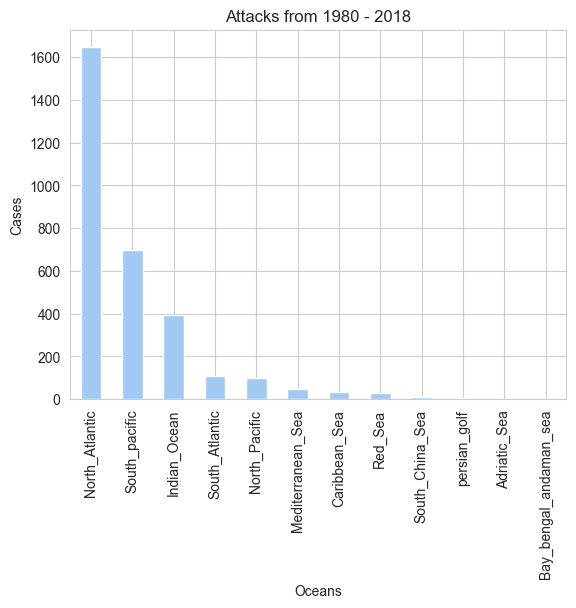

In [78]:
sns.set_style("whitegrid")
sns.set_palette("pastel")
df_filtered = df8[(df8['Year'] >= 1980) & (df8['Year'] <= 2018)]
df_filtered["Oceans"].value_counts().plot(kind="bar", title="Attacks from 1980 - 2018")
plt.xticks(rotation=90, fontsize=10)
plt.ylabel("Cases")
plt.savefig('figures/oceans.png')
plt.show()

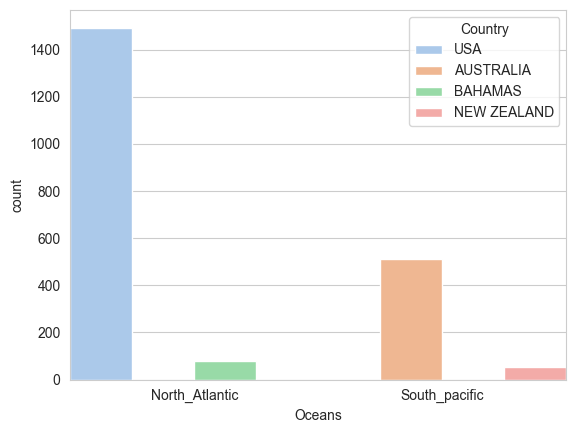

In [79]:
sns.set_style("whitegrid")
sns.set_palette("pastel")
oceans_to_include = ["North_Atlantic", "South_pacific"]
df_filtered = df8[(df8['Year'] >= 1980) & (df8['Year'] <= 2018) & df8['Oceans'].isin(oceans_to_include)]
top_countries = df_filtered.groupby('Oceans')['Country'].value_counts().groupby('Oceans').head(2).index.get_level_values('Country').tolist()
sns.countplot(x='Oceans', hue='Country', data=df_filtered[df_filtered['Country'].isin(top_countries)],width=1);
plt.savefig('figures/countries.png')
plt.show()

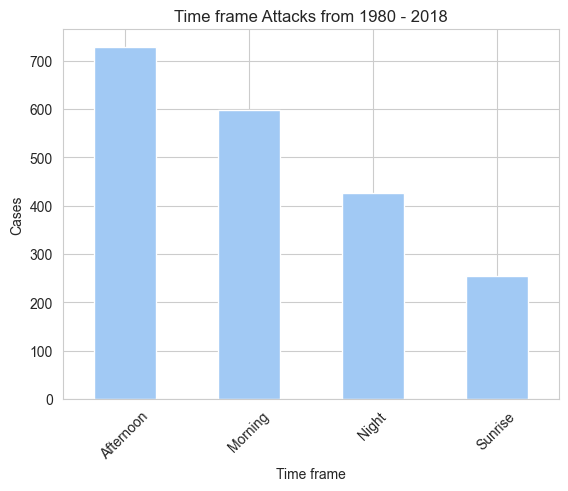

In [80]:
sns.set_style("whitegrid")
sns.set_palette("pastel")
df_filtered2 = df9[(df9['Year'] >= 1980) & (df9['Year'] <= 2018)]
df_filtered2["Time frame"].value_counts().plot(kind="bar", title="Time frame Attacks from 1980 - 2018")
plt.xticks(rotation=45, fontsize=10)
plt.ylabel("Cases")
plt.savefig('figures/time.png')
plt.show()
